# Data Understanding

### Student Data

In [11]:
import pandas as pd

#student = pd.read_csv('../../databases/2022/STU_QQQ_SAS/student2022.csv', nrows=1000)
student = pd.read_csv('../../databases/2022/STU_QQQ_SAS/student2022.csv')


In [12]:
# Shuffle the DataFrame
student = student.sample(frac=1).reset_index(drop=True)

# Remove x percent of the data
x_percent = 0.5  # Example: Remove 20% of the data
num_rows_to_remove = int(len(student) * x_percent)
student = student.iloc[num_rows_to_remove:].reset_index(drop=True)

In [13]:
student.head()

,CNT,CNTRYID,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,REGION,OECD,...,PV3MPRE,PV4MPRE,PV5MPRE,PV6MPRE,PV7MPRE,PV8MPRE,PV9MPRE,PV10MPRE,SENWT,VER_DAT
0,b'ISR',376.0,37600060.0,37605422.0,b'08MS',b'037600',b'ISR97',b'3760000',37600.0,1.0,...,398.596,395.434,444.814,473.918,368.916,414.605,436.993,424.288,0.79777,b'02MAY23:14:24:01'
1,b'ARE',784.0,78400729.0,78402533.0,b'08MS',b'078403',b'ARE17',b'7840200',78400.0,0.0,...,429.355,520.879,483.853,471.387,465.185,475.974,366.428,504.428,0.19065,b'01MAY23:15:38:18'
2,b'ITA',380.0,38000237.0,38015198.0,b'08MS',b'038000',b'ITA97',b'3800000',38000.0,1.0,...,594.270,529.744,580.772,570.042,557.467,544.229,607.916,626.101,0.02979,b'01MAY23:17:12:06'
3,b'PRT',620.0,62000132.0,62004125.0,b'08MS',b'062000',b'PRT13',b'6200000',62000.0,1.0,...,421.370,449.609,443.660,470.412,496.374,424.326,419.308,414.402,0.73722,b'02MAY23:14:50:01'
4,b'KAZ',398.0,39800195.0,39820078.0,b'08MS',b'039800',b'KAZ09',b'3980000',39809.0,0.0,...,503.071,528.378,404.883,436.926,421.889,379.879,476.113,458.888,0.27844,b'01MAY23:17:45:52'


In [15]:
def filter_by_grade(dataframe, grade):
    return dataframe[dataframe["ST001D01T"] == grade]

def get_math_results(dataframe):
    math_columns = [
        "PV1MATH",
        "PV2MATH",
        "PV3MATH",
        "PV4MATH",
        "PV5MATH",
        "PV6MATH",
        "PV7MATH",
        "PV8MATH",
        "PV9MATH",
        "PV10MATH",
    ]

    math_results = dataframe.copy()
    math_results["Avg Math Result"] = math_results[math_columns].mean(axis=1)
    # math_results["Min Math Result"] = math_results[math_columns].min(axis=1)
    # math_results["Max Math Result"] = math_results[math_columns].max(axis=1)

    math_results = math_results.drop(columns=math_columns)

    return math_results

def get_science_results(dataframe):
    science_columns = [
        "PV1SCIE",
        "PV2SCIE",
        "PV3SCIE",
        "PV4SCIE",
        "PV5SCIE",
        "PV6SCIE",
        "PV7SCIE",
        "PV8SCIE",
        "PV9SCIE",
        "PV10SCIE",
    ]

    scie_results = dataframe.copy()
    scie_results["Avg Science Result"] = scie_results[science_columns].mean(axis=1)
    # scie_results["Min Science Result"] = scie_results[science_columns].min(axis=1)
    # scie_results["Max Science Result"] = scie_results[science_columns].max(axis=1)

    scie_results = scie_results.drop(columns=science_columns)

    return scie_results

def get_reading_results(dataframe):
    reading_columns = [
        "PV1READ",
        "PV2READ",
        "PV3READ",
        "PV4READ",
        "PV5READ",
        "PV6READ",
        "PV7READ",
        "PV8READ",
        "PV9READ",
        "PV10READ",
    ]

    reading_results = dataframe.copy()
    reading_results["Avg Reading Result"] = reading_results[reading_columns].mean(
        axis=1
    )
    # reading_results["Min Reading Result"] = reading_results[reading_columns].min(axis=1)
    # reading_results["Max Reading Result"] = reading_results[reading_columns].max(axis=1)

    reading_results = reading_results.drop(columns=reading_columns)

    return reading_results

def remove_subscales(dataframe):
    """
    Remove content subscales of mathematics

    :param dataframe:
    :return:
    """
    math_subscales = [
        "PV1MCCR",
        "PV2MCCR",
        "PV3MCCR",
        "PV4MCCR",
        "PV5MCCR",
        "PV6MCCR",
        "PV7MCCR",
        "PV8MCCR",
        "PV9MCCR",
        "PV10MCCR",
        "PV1MCQN",
        "PV2MCQN",
        "PV3MCQN",
        "PV4MCQN",
        "PV5MCQN",
        "PV6MCQN",
        "PV7MCQN",
        "PV8MCQN",
        "PV9MCQN",
        "PV10MCQN",
        "PV1MCSS",
        "PV2MCSS",
        "PV3MCSS",
        "PV4MCSS",
        "PV5MCSS",
        "PV6MCSS",
        "PV7MCSS",
        "PV8MCSS",
        "PV9MCSS",
        "PV10MCSS",
        "PV1MCUD",
        "PV2MCUD",
        "PV3MCUD",
        "PV4MCUD",
        "PV5MCUD",
        "PV6MCUD",
        "PV7MCUD",
        "PV8MCUD",
        "PV9MCUD",
        "PV10MCUD",
        "PV1MPEM",
        "PV2MPEM",
        "PV3MPEM",
        "PV4MPEM",
        "PV5MPEM",
        "PV6MPEM",
        "PV7MPEM",
        "PV8MPEM",
        "PV9MPEM",
        "PV10MPEM",
        "PV1MPFS",
        "PV2MPFS",
        "PV3MPFS",
        "PV4MPFS",
        "PV5MPFS",
        "PV6MPFS",
        "PV7MPFS",
        "PV8MPFS",
        "PV9MPFS",
        "PV10MPFS",
        "PV1MPIN",
        "PV2MPIN",
        "PV3MPIN",
        "PV4MPIN",
        "PV5MPIN",
        "PV6MPIN",
        "PV7MPIN",
        "PV8MPIN",
        "PV9MPIN",
        "PV10MPIN",
        "PV1MPRE",
        "PV2MPRE",
        "PV3MPRE",
        "PV4MPRE",
        "PV5MPRE",
        "PV6MPRE",
        "PV7MPRE",
        "PV8MPRE",
        "PV9MPRE",
        "PV10MPRE",
    ]

    new_df = dataframe.copy()
    new_df = new_df.drop(columns=math_subscales)

    return new_df

Remove content subscales of mathematics

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

student = get_math_results(student)
student = get_reading_results(student)
student = get_science_results(student)

## Show relation of students by country that repeated

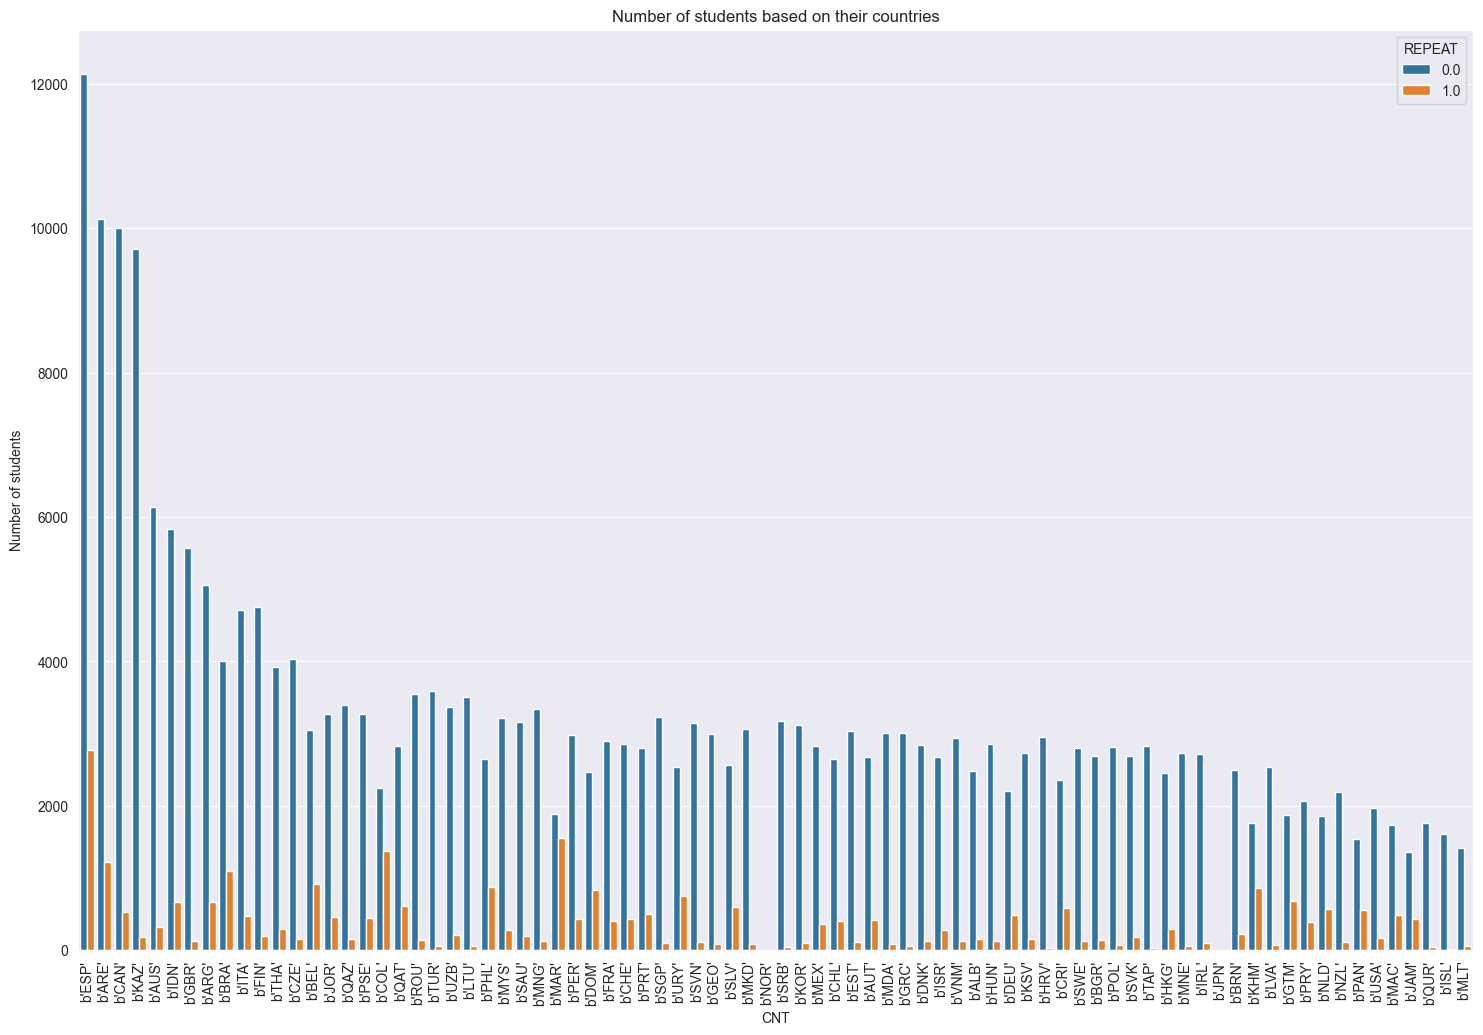

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize = [18, 55])

plt.subplot(4, 1, 1)
base_color = sns.color_palette()[0]
sns.countplot(data = student, x = 'CNT', hue="REPEAT", order=student['CNT'].value_counts().index)

plt.title('Number of students based on their countries')
plt.xticks(rotation='vertical');
plt.ylabel('Number of students');

Text(0.5, 0, 'Gender')

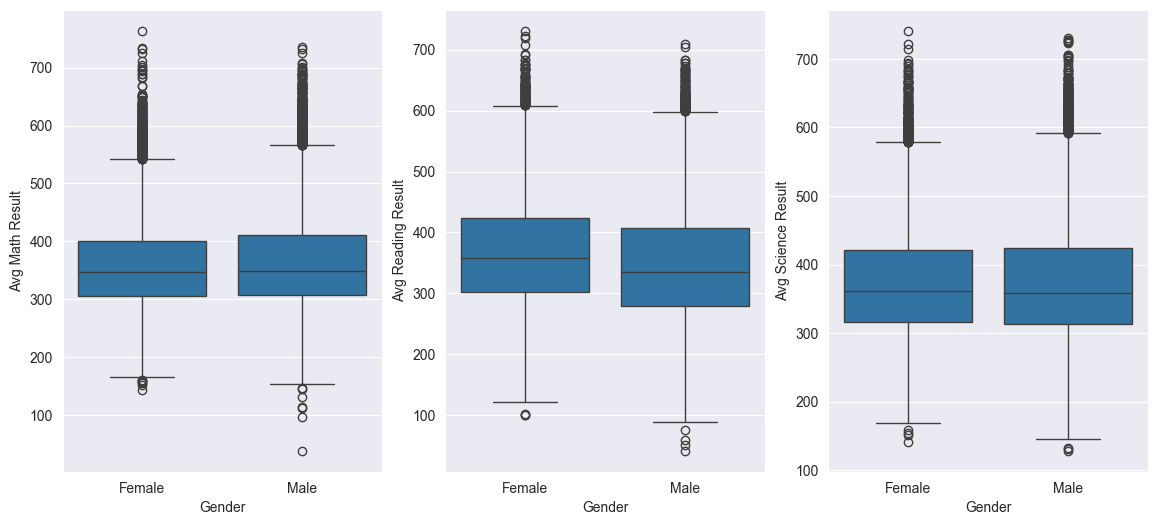

In [18]:
student["ST004D01T"] = student["ST004D01T"].replace({1.0: "Female", 2.0: "Male"})
plt.figure(figsize=(14,6))
plt.subplot(131)
sns.boxplot(data=student[student["REPEAT"] == 1], y="Avg Math Result", x="ST004D01T")
plt.xlabel("Gender")
plt.subplot(132)
sns.boxplot(data=student[student["REPEAT"] == 1], y="Avg Reading Result", x="ST004D01T")
plt.xlabel("Gender")
plt.subplot(133)
sns.boxplot(data=student[student["REPEAT"] == 1], y="Avg Science Result", x="ST004D01T")
plt.xlabel("Gender")

Text(0.5, 0, 'Gender')

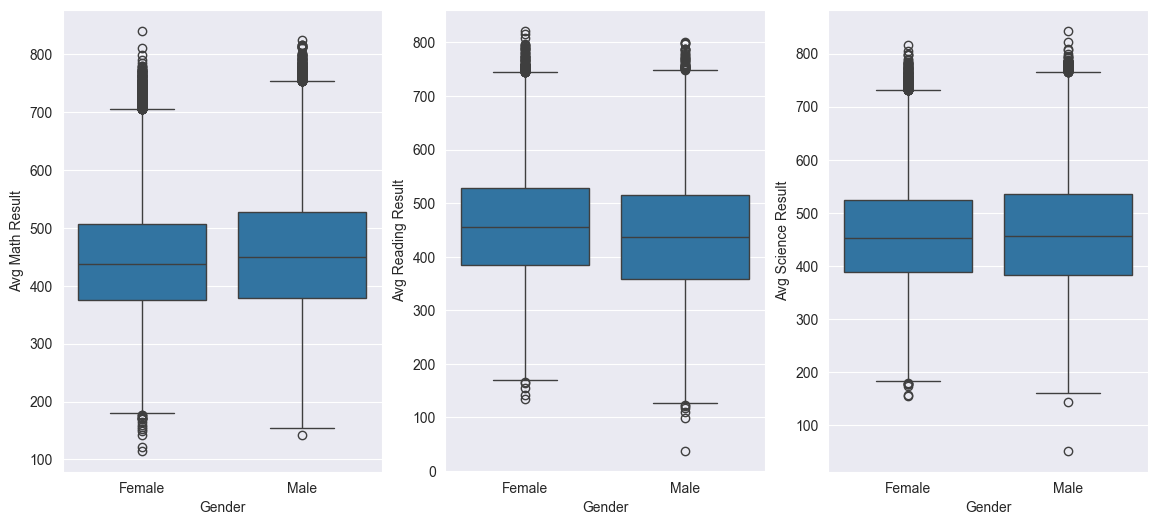

In [19]:
plt.figure(figsize=(14,6))
plt.subplot(131)
sns.boxplot(data=student[student["REPEAT"] == 0], y="Avg Math Result", x="ST004D01T")
plt.xlabel("Gender")
plt.subplot(132)
sns.boxplot(data=student[student["REPEAT"] == 0], y="Avg Reading Result", x="ST004D01T")
plt.xlabel("Gender")
plt.subplot(133)
sns.boxplot(data=student[student["REPEAT"] == 0], y="Avg Science Result", x="ST004D01T")
plt.xlabel("Gender")

Correlação não repetentes

In [27]:
corr = student[student["REPEAT"] == 0].corr(numeric_only=True)["Avg Math Result"].sort_values(ascending=False)

In [44]:
print(corr.head())

plt.figure(figsize=(30,30))

corr = corr[corr>0.5]
#corr = corr.where(corr>0.5, 0)
print(corr.head())
sns.barplot(x=corr.values, y=corr.index)
#sns.heatmap(corr);

           CNTRYID  CNTSCHID  CNTSTUID    REGION  OECD  ADMINMODE  \
CNTRYID   1.000000  1.000000  0.999885  1.000000   NaN        NaN   
CNTSCHID  1.000000  1.000000  0.999885  1.000000   NaN        NaN   
CNTSTUID  0.999885  0.999885  1.000000  0.999885   NaN        NaN   
REGION    1.000000  1.000000  0.999885  1.000000   NaN        NaN   
OECD           NaN       NaN       NaN       NaN   1.0        NaN   

          LANGTEST_QQQ  LANGTEST_COG  LANGTEST_PAQ  Option_CT  ...  PV5MPRE  \
CNTRYID            NaN           NaN           NaN        NaN  ...      NaN   
CNTSCHID           NaN           NaN           NaN        NaN  ...      NaN   
CNTSTUID           NaN           NaN           NaN        NaN  ...      NaN   
REGION             NaN           NaN           NaN        NaN  ...      NaN   
OECD               NaN           NaN           NaN        NaN  ...      NaN   

          PV6MPRE  PV7MPRE  PV8MPRE  PV9MPRE  PV10MPRE  SENWT  \
CNTRYID       NaN      NaN      NaN      NaN 

ValueError: Per-column arrays must each be 1-dimensional

<Figure size 3000x3000 with 0 Axes>

In [29]:
corr = student[student["REPEAT"] == 1].corr(numeric_only=True)

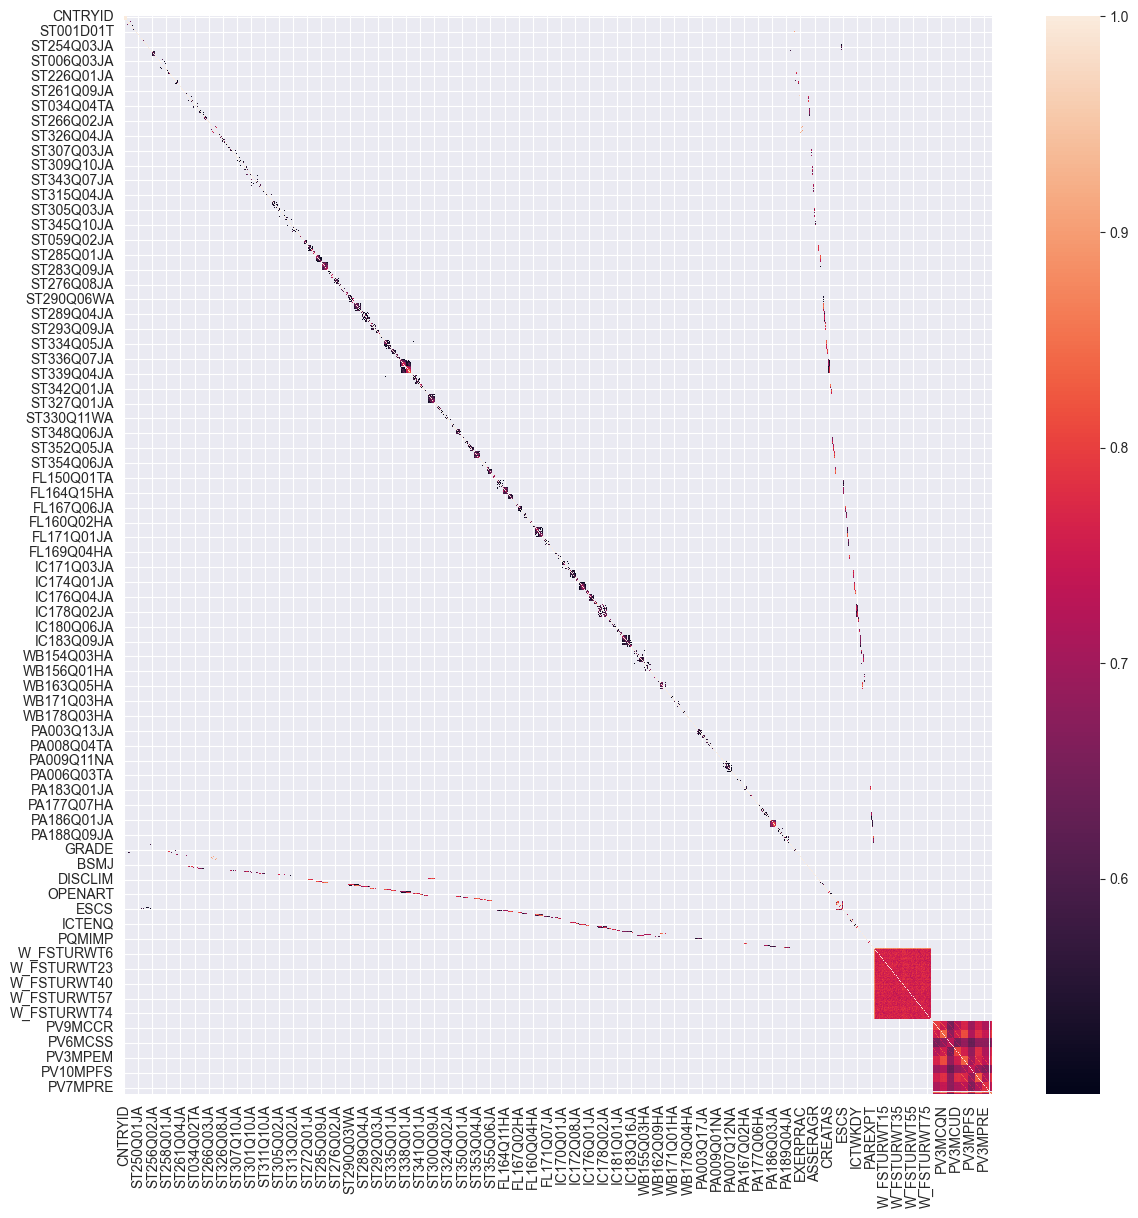

In [30]:
plt.figure(figsize=(14,14))
#sns.barplot(x=corr[corr>=.4].values, y=corr[corr>=.7].index)
sns.heatmap(corr[corr>=.5]);
#sns.heatmap(corr_repeated[corr_repeated<.5]);